This notebook: 

This notebook: 

transformational efficacy analysis (TVI computations) for priority (cued location - 'PMI' or 'UMI')


In [1]:
!pip install dpca

In [3]:
#cd /content/gdrive/My Drive/dpca_code_V2
#from pumi import * 
#from fit_scaling import *
#import dpca as dp
#import plotting as pf
#import matplotlib.pyplot as plt
#from google.colab import files
#from scipy import io
#from scipy import stats

import numpy as np
import io
import pandas as pd
import matplotlib.pyplot as plt
from pumi import *
from fit_scaling import *
import dpca as dp
import plotting_updown_ver2 as pf
from scipy import io
from scipy import stats
import scipy.io as sio
import math


[8.153277621525309, 8.038822962698601, 2.7276440892820495, 7.804770046025027, 6.431406508490032, 3.8754353129720114, 2.7085046492274136, 4.324225961826748, 3.541056125009264, 4.1009406935558195, 2.1340355775876847, 1.724726486994199]
[14.927973172735813, 8.799426292349844, 2.3992916325234233, 4.377962263520448, 4.727452711907559, 3.691227308423818, 2.726747025485455, 3.1829524682617425, 3.177875645012528, 4.3596245682156525, 1.8332441272104834, 2.6269944201092557]
[3.617683687376298, 3.61393661958502, 3.722614986281781, 2.8309186893230063, 3.777830497157958, 9.134171952993254, 3.801303271190916, 5.364764118521751, 4.474014534296224, 6.556534586724762, 2.120850429557443, 1.682263671869493]
[3.1518469827602513, 4.030155984565296, 7.078692423530793, 1.6201303335296275, 3.541103767638984, 15.252555626727192, 5.022914811968292, 3.923747181035207, 4.554817966820191, 12.048975592150082, 1.7500475078066589, 2.545200038592071]
[8.118513674945277, 7.603583707150613, 2.7757609911416887, 8.5433208

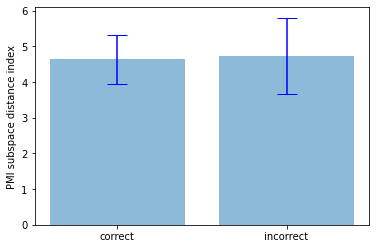

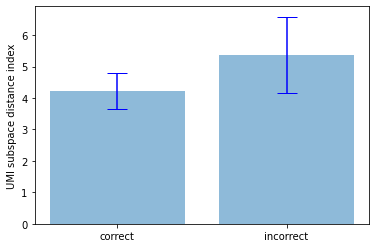

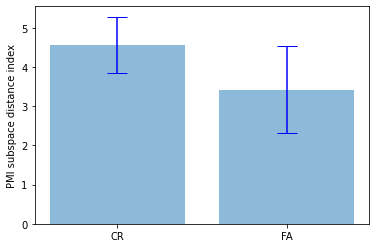

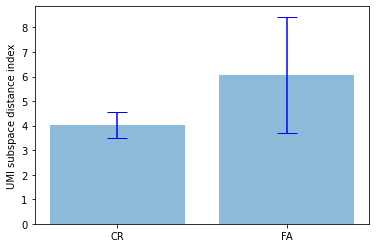

In [5]:
# First does 'Prioritized' (PMI; cued) subspace analysis, Then does 'Unprioritized' (UMI; uncued) subspace analysis

num_sub = 12
sub_FA_PMI = []
sub_CR_PMI = []
sub_FA_UMI = []
sub_CR_UMI = []
sub_corr_PMI = []
sub_incorr_PMI = []
sub_corr_UMI = []
sub_incorr_UMI = []
sub_PMI = []
sub_UMI = []
sub_correlation = []
sub_r = []
sub_p = []
sub_corr_r = []
sub_corr_p = []
sub_incorr_r = []
sub_incorr_p = []

for subject_id in range(num_sub):

    # first load average data for each condition to do dPCA and derive subspaces
    sub_id = str(subject_id+1)
    filename='[PATH TO DATA DIRECTORY]/DSR_priorityversion/S' + sub_id + 'fulltimecourseAllupdown.mat'
    matdata = sio.loadmat(filename)

    data_PMI=matdata['avgdataPMI'] # PMI "all" data
    data_tmp=data_PMI[:,401:601,:]
    data_tmp=center(data_tmp)

    data_UMI=matdata['avgdataUMI'] #6 rows: face up, word up, dots up, face down, word down, dots down
  

    cat_model = dp.dPCA(data_tmp, n_dim = 2, old_version=True)
    d = cat_model.decoder
    XPMI = np.matmul(center(data_PMI),d) # project data into 'PMI' subspace
    XUMI = np.matmul(center(data_UMI),d) 
    
    xyPMI = XPMI[:,401:601,:].mean(1)
    xyUMI = XUMI[:,401:601,:].mean(1)
    
    # compute 'general' (Euclidean) distances between 'PMI' and 'UMI' in the 'PMI' subspace for each of the six stim categories
    normdist1 = math.sqrt(((xyPMI[0,0]-xyUMI[0,0])**2)+((xyPMI[0,1]-xyUMI[0,1])**2))
    normdist2 = math.sqrt(((xyPMI[1,0]-xyUMI[1,0])**2)+((xyPMI[1,1]-xyUMI[1,1])**2))
    normdist3 = math.sqrt(((xyPMI[2,0]-xyUMI[2,0])**2)+((xyPMI[2,1]-xyUMI[2,1])**2))
    normdist4 = math.sqrt(((xyPMI[3,0]-xyUMI[3,0])**2)+((xyPMI[3,1]-xyUMI[3,1])**2))
    normdist5 = math.sqrt(((xyPMI[4,0]-xyUMI[4,0])**2)+((xyPMI[4,1]-xyUMI[4,1])**2))
    normdist6 = math.sqrt(((xyPMI[5,0]-xyUMI[5,0])**2)+((xyPMI[5,1]-xyUMI[5,1])**2))

    # now load individual trial data
    filename='[PATH TO DATA DIRECTORY]/DSR_trialinfo/trinfo_S_0' + sub_id + '_2D.mat'
    matdata = sio.loadmat(filename)
    trinfo=matdata['trialinfo'] # individual trial info

    filename='[PATH TO DATA DIRECTORY]/DSR_alltrials/S' + sub_id + 'alltrials.mat'
    matdata = sio.loadmat(filename)
    alldata=matdata['data'] # individual trial data

    Xindivtrials = np.matmul(center(alldata),d) # project data into 'PMI' subspace
    num_trials = len(Xindivtrials)
   
    trdist = []
    trnormdist = []
    FA = []
    CR = []
    correct = []
    incorrect = []

    # calculate for only 'PMI' stimuli - because this will be 'PMI' distances in 'PMI' subspace
    # first calculate the distance between the individual trial's projection in the 'PMI' space and 
    # the 'general' representation in 'PMI' subspace for that stimulus category
    # then, normalize that by the general distances computed above
    for tr in range(num_trials): 
        xytrial = Xindivtrials[tr,401:601,:].mean(0) 
        if trinfo[tr,3] == 1: # PMI was a face; 3 - probe 1; 5 - probe 2 - SWITCH TO 5 FOR PROBE 2 ANALYSIS
            if trinfo[tr,2] == 1 or trinfo[tr,2] == 2: # face was up
                trdist += [math.sqrt(((xytrial[0]-xyPMI[0,0])**2)+((xytrial[1]-xyPMI[0,1])**2))]
                trnormdist += [trdist[-1] / normdist1]
               # plt.plot(xytrial[0],xytrial[1],'o',color = plot_colors[0])
            elif trinfo[tr,2] == 4 or trinfo[tr,2] == 5: # face was down
                trdist += [math.sqrt(((xytrial[0]-xyPMI[3,0])**2)+((xytrial[1]-xyPMI[3,1])**2))]
                trnormdist += [trdist[-1] / normdist4]
               # plt.plot(xytrial[0],xytrial[1],'o',color = plot_colors[3])
        elif trinfo[tr,3] == 2: # PMI was dot motion - SWITCH TO 5 FOR PROBE 2 ANALYSIS
            if trinfo[tr,2] == 3 or trinfo[tr,2] == 4: # motion was up
                trdist += [math.sqrt(((xytrial[0]-xyPMI[2,0])**2)+((xytrial[1]-xyPMI[2,1])**2))]
                trnormdist += [trdist[-1] / normdist3]
                #plt.plot(xytrial[0],xytrial[1],'o',color = plot_colors[2])
            elif trinfo[tr,2] == 1 or trinfo[tr,2] == 6: # motion was down
                trdist += [math.sqrt(((xytrial[0]-xyPMI[5,0])**2)+((xytrial[1]-xyPMI[5,1])**2))]       
                trnormdist += [trdist[-1] / normdist6]
               # plt.plot(xytrial[0],xytrial[1],'o',color = plot_colors[5])
        elif trinfo[tr,3] == 3: # PMI was a word - SWITCH TO 5 FOR PROBE 2 ANALYSIS
            if trinfo[tr,2] == 5 or trinfo[tr,2] == 6: # word was up
                trdist += [math.sqrt(((xytrial[0]-xyPMI[1,0])**2)+((xytrial[1]-xyPMI[1,1])**2))]
                trnormdist += [trdist[-1] / normdist2]
               # plt.plot(xytrial[0],xytrial[1],'o',color = plot_colors[1])
            elif trinfo[tr,2] == 2 or trinfo[tr,2] == 3: # word was down
                trdist += [math.sqrt(((xytrial[0]-xyPMI[4,0])**2)+((xytrial[1]-xyPMI[4,1])**2))] 
                trnormdist += [trdist[-1] / normdist5]
               # plt.plot(xytrial[0],xytrial[1],'o',color = plot_colors[4])
    
    for tr in range(num_trials):
        if trinfo[tr,3] == trinfo[tr,5]: # stay trial for probe 2 analysis
            if trinfo[tr,14] == 1: # lure probe trial; 14- probe 1; 15 - probe 2 - SWITCH TO 15 FOR PROBE 2 ANALYSIS
                if trinfo[tr,7] == 1: # CR - index is #7 for Probe 1 responses; #9 for Probe 2 - SWITCH TO 9 FOR PROBE 2 ANALYSIS
                    CR += [trnormdist[tr]]
                elif trinfo[tr,7] == -1: # FA - SWITCH TO 9 FOR PROBE 2 ANALYSIS
                    FA += [trnormdist[tr]]
      
            if trinfo[tr,7] == 1: # CR/hit - SWITCH TO 9 FOR PROBE 2 ANALYSIS
                correct += [trnormdist[tr]]
            elif trinfo[tr,7] == -1: # FA/miss - SWITCH TO 9 FOR PROBE 2 ANALYSIS
                incorrect += [trnormdist[tr]]

    # now do some averaging and compiling for between-subjects and within-subjects analyses
    tmpcr = np.array(CR) 
    tmpfa = np.array(FA)
    sub_CR_PMI += [np.mean(tmpcr)] 
    sub_FA_PMI += [np.mean(tmpfa)] 
    
    tmpcorr = np.array(correct) 
    tmpincorr = np.array(incorrect)
    sub_corr_PMI += [np.mean(tmpcorr)] 
    sub_incorr_PMI += [np.mean(tmpincorr)] 
    sub_PMI += [np.mean(trnormdist)]
    sub_PMI_all = np.array(trnormdist)
    sub_PMI_corr = np.array(correct) 
    sub_PMI_incorr = np.array(incorrect)
    

    # now repeat the above for 'UMI' subspace-based analyses
    sub_id = str(subject_id+1)
    filename='[PATH TO DATA DIRECTORY]/DSR_priorityversion/S' + sub_id + 'fulltimecourseAllupdown.mat'
    matdata = sio.loadmat(filename)

    data_UMI=matdata['avgdataUMI'] #  6 rows (dimension 1): face up, word up, dots up, face down, word down, dots down
    data_tmp=data_UMI[:,401:601,:] # 'UMI' subspace model - timepoints from Delay 1.2
    data_tmp=center(data_tmp)

    data_PMI=matdata['avgdataPMI'] 

    cat_model = dp.dPCA(data_tmp, n_dim = 2, old_version=True)
    d = cat_model.decoder
    XPMI = np.matmul(center(data_PMI),d) # project data into 'UMI' subspace
    XUMI = np.matmul(center(data_UMI),d) 
    
    xyPMI = XPMI[:,401:601,:].mean(1)
    xyUMI = XUMI[:,401:601,:].mean(1)

    # compute 'general' distances between 'PMI' and 'UMI' in the 'UMI' subspace for each of the six stim categories
    normdist1 = math.sqrt(((xyPMI[0,0]-xyUMI[0,0])**2)+((xyPMI[0,1]-xyUMI[0,1])**2))
    normdist2 = math.sqrt(((xyPMI[1,0]-xyUMI[1,0])**2)+((xyPMI[1,1]-xyUMI[1,1])**2))
    normdist3 = math.sqrt(((xyPMI[2,0]-xyUMI[2,0])**2)+((xyPMI[2,1]-xyUMI[2,1])**2))
    normdist4 = math.sqrt(((xyPMI[3,0]-xyUMI[3,0])**2)+((xyPMI[3,1]-xyUMI[3,1])**2))
    normdist5 = math.sqrt(((xyPMI[4,0]-xyUMI[4,0])**2)+((xyPMI[4,1]-xyUMI[4,1])**2))
    normdist6 = math.sqrt(((xyPMI[5,0]-xyUMI[5,0])**2)+((xyPMI[5,1]-xyUMI[5,1])**2))

    filename='[PATH TO DATA DIRECTORY]/DSR_trialinfo/trinfo_S_0' + sub_id + '_2D.mat'
    matdata = sio.loadmat(filename)
    trinfo=matdata['trialinfo'] # individual trial info

    filename='[PATH TO DATA DIRECTORY]/DSR_alltrials/S' + sub_id + 'alltrials.mat'
    matdata = sio.loadmat(filename)
    alldata=matdata['data'] # individual trial data

    Xindivtrials = np.matmul(center(alldata),d) # project data into 'UMI' subspace
    num_trials = len(Xindivtrials)
   
    trdist = []
    trnormdist = []
    FA = []
    CR = []
    correct = []
    incorrect = []


    for tr in range(num_trials): 
        xytrial = Xindivtrials[tr,401:601,:].mean(0) 
        if trinfo[tr,4] == 1: # UMI was a face 4 - probe 1; 6 - probe 2 - SWITCH TO 6 FOR PROBE 2 ANALYSIS
            if trinfo[tr,2] == 1 or trinfo[tr,2] == 2: # face was up
                trdist += [math.sqrt(((xytrial[0]-xyUMI[0,0])**2)+((xytrial[1]-xyUMI[0,1])**2))]
                trnormdist += [trdist[-1] / normdist1]
               # plt.plot(xytrial[0],xytrial[1],'o',color = plot_colors[0])
            elif trinfo[tr,2] == 4 or trinfo[tr,2] == 5: # face was down
                trdist += [math.sqrt(((xytrial[0]-xyUMI[3,0])**2)+((xytrial[1]-xyUMI[3,1])**2))]
                trnormdist += [trdist[-1] / normdist4]
               # plt.plot(xytrial[0],xytrial[1],'o',color = plot_colors[3])
        elif trinfo[tr,4] == 2: # UMI was dot motion - SWITCH TO 6 FOR PROBE 2 ANALYSIS
            if trinfo[tr,2] == 3 or trinfo[tr,2] == 4: # motion was up
                trdist += [math.sqrt(((xytrial[0]-xyUMI[2,0])**2)+((xytrial[1]-xyUMI[2,1])**2))]
                trnormdist += [trdist[-1] / normdist3]
                #plt.plot(xytrial[0],xytrial[1],'o',color = plot_colors[2])
            elif trinfo[tr,2] == 1 or trinfo[tr,2] == 6: # motion was down
                trdist += [math.sqrt(((xytrial[0]-xyUMI[5,0])**2)+((xytrial[1]-xyUMI[5,1])**2))]       
                trnormdist += [trdist[-1] / normdist6]
               # plt.plot(xytrial[0],xytrial[1],'o',color = plot_colors[5])
        elif trinfo[tr,4] == 3: # UMI was a word - SWITCH TO 6 FOR PROBE 2 ANALYSIS
            if trinfo[tr,2] == 5 or trinfo[tr,2] == 6: # word was up
                trdist += [math.sqrt(((xytrial[0]-xyUMI[1,0])**2)+((xytrial[1]-xyUMI[1,1])**2))]
                trnormdist += [trdist[-1] / normdist2]
               # plt.plot(xytrial[0],xytrial[1],'o',color = plot_colors[1])
            elif trinfo[tr,2] == 2 or trinfo[tr,2] == 3: # word was down
                trdist += [math.sqrt(((xytrial[0]-xyUMI[4,0])**2)+((xytrial[1]-xyUMI[4,1])**2))] 
                trnormdist += [trdist[-1] / normdist5]
               # plt.plot(xytrial[0],xytrial[1],'o',color = plot_colors[4])
    
    for tr in range(num_trials):
        if trinfo[tr,3] == trinfo[tr,5]: # stay (==) / switch (!=) trial for probe 2 analysis
            if trinfo[tr,14] == 1: # lure probe trial; 14- probe 1; 15 - probe 2 - SWITCH TO 15 FOR PROBE 2 ANALYSIS
                if trinfo[tr,7] == 1: # CR - index is #7 for Probe 1 responses; #9 for Probe 2 - SWITCH TO 9 FOR PROBE 2 ANALYSIS
                    CR += [trnormdist[tr]]
                elif trinfo[tr,7] == -1: # FA - SWITCH TO 9 FOR PROBE 2 ANALYSIS
                    FA += [trnormdist[tr]]
      
            if trinfo[tr,7] == 1: # CR/hit - SWITCH TO 9 FOR PROBE 2 ANALYSIS
                correct += [trnormdist[tr]]
            elif trinfo[tr,7] == -1: # FA/miss - SWITCH TO 9 FOR PROBE 2 ANALYSIS
                incorrect += [trnormdist[tr]]

    tmpcr = np.array(CR) 
    tmpfa = np.array(FA)
    sub_CR_UMI += [np.mean(tmpcr)] 
    sub_FA_UMI += [np.mean(tmpfa)] 
    
    tmpcorr = np.array(correct) 
    tmpincorr = np.array(incorrect)
    sub_corr_UMI += [np.mean(tmpcorr)] 
    sub_incorr_UMI += [np.mean(tmpincorr)]
    sub_UMI += [np.mean(trnormdist)]
    sub_UMI_all = np.array(trnormdist)
    
    # find individual subject correlations between 'up' and 'down' transformational efficacies
    #r, p = stats.pearsonr(sub_up_all,sub_down_all) # data violate assumptions of Pearson, so we use Spearman corr
    res = stats.spearmanr(sub_PMI_all,sub_UMI_all)
    sub_r += [res.correlation]
    sub_p += [res.pvalue]
    
    sub_UMI_corr = np.array(correct) 
    sub_UMI_incorr = np.array(incorrect)
    
    res = stats.spearmanr(sub_PMI_corr,sub_UMI_corr)
    sub_corr_r += [res.correlation]
    sub_corr_p += [res.pvalue]
   
    res = stats.spearmanr(sub_PMI_incorr,sub_UMI_incorr)
    sub_incorr_r += [res.correlation]
    sub_incorr_p += [res.pvalue]
    
    #plt.scatter(sub_up_all,sub_down_all) # view data 
    #plt.show()
    

# plotting, and printing of data to be used in any additional analyses here or in other programs of choice such as Matlab, which was done here in carrying out the t-tests. 
# to turn various reports on and off, use # to comment or delete #'s to uncomment

# bar plot of transformational efficacy in 'PMI' space by response accuracy
A_corr = np.mean(sub_corr_PMI)
A_corr_err = stats.sem(sub_corr_PMI)
A_incorr = np.mean(sub_incorr_PMI)
A_incorr_err = stats.sem(sub_incorr_PMI)
xvals = [1,2]
yvals = [A_corr, A_incorr]
error = [A_corr_err, A_incorr_err]
accuracies = ['correct','incorrect']
fig, ax = plt.subplots()

ax.bar(xvals, yvals, yerr=error, align='center', alpha=0.5, ecolor='b', capsize=10)
ax.set_ylabel('PMI subspace distance index')
ax.set_xticks(xvals)
ax.set_xticklabels(accuracies)
ax.yaxis.grid(False)

#print(A_corr)
#print(A_corr_err)
#print(A_incorr)
#print(A_incorr_err)

# bar plot of transformational efficacy in 'UMI' space by response accuracy
A_corr = np.mean(sub_corr_UMI)
A_corr_err = stats.sem(sub_corr_UMI)
A_incorr = np.mean(sub_incorr_UMI)
A_incorr_err = stats.sem(sub_incorr_UMI)
xvals = [1,2]
yvals = [A_corr, A_incorr]
error = [A_corr_err, A_incorr_err]
accuracies = ['correct','incorrect']
fig, ax = plt.subplots()

ax.bar(xvals, yvals, yerr=error, align='center', alpha=0.5, ecolor='b', capsize=10)
ax.set_ylabel('UMI subspace distance index')
ax.set_xticks(xvals)
ax.set_xticklabels(accuracies)
ax.yaxis.grid(False)

print(sub_corr_PMI)
print(sub_incorr_PMI)
print(sub_corr_UMI)
print(sub_incorr_UMI)
#print(A_corr)
#print(A_corr_err)
#print(A_incorr)
#print(A_incorr_err)
#print(sub_r)
#print(sub_p)
#print(sub_corr_r)
#print(sub_corr_p)
#print(sub_incorr_r)
#print(sub_incorr_p)

# bar plot of transformational efficacy in 'PMI' space by response accuracy on lure probe trials
A_CR = np.mean(sub_CR_PMI)
A_CR_err = stats.sem(sub_CR_PMI)
A_FA = np.mean(sub_FA_PMI)
A_FA_err = stats.sem(sub_FA_PMI)
xvals = [1,2]
yvals = [A_CR, A_FA]
error = [A_CR_err, A_FA_err]
accuracies = ['CR','FA']
fig, ax = plt.subplots()

ax.bar(xvals, yvals, yerr=error, align='center', alpha=0.5, ecolor='b', capsize=10)
ax.set_ylabel('PMI subspace distance index')
ax.set_xticks(xvals)
ax.set_xticklabels(accuracies)
ax.yaxis.grid(False)

#print(A_CR)
#print(A_CR_err)
#print(A_FA)
#print(A_FA_err)

# bar plot of transformational efficacy in 'UMI' space by response accuracy on lure probe trials
A_CR = np.mean(sub_CR_UMI)
A_CR_err = stats.sem(sub_CR_UMI)
A_FA = np.mean(sub_FA_UMI)
A_FA_err = stats.sem(sub_FA_UMI)
xvals = [1,2]
yvals = [A_CR, A_FA]
error = [A_CR_err, A_FA_err]
accuracies = ['CR','FA']
fig, ax = plt.subplots()

ax.bar(xvals, yvals, yerr=error, align='center', alpha=0.5, ecolor='b', capsize=10)
ax.set_ylabel('UMI subspace distance index')
ax.set_xticks(xvals)
ax.set_xticklabels(accuracies)
ax.yaxis.grid(False)

#print(A_CR)
#print(A_CR_err)
#print(A_FA)
#print(A_FA_err)
print(sub_CR_PMI)
print(sub_FA_PMI)
print(sub_CR_UMI)
print(sub_FA_UMI)